In [18]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.test.num_examples

10000

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
mnist.train.images[1].shape

(784,)

In [13]:
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

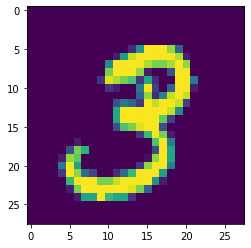

In [14]:
plt.imshow(mnist.train.images[1].reshape(28,28))

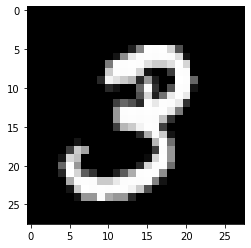

In [16]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

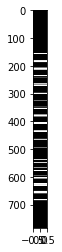

In [19]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

In [20]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [21]:
W = tf.Variable(tf.zeros([784,10]))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
b = tf.Variable(tf.zeros([10]))

In [23]:
y = tf.matmul(x,W)+b

In [24]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [25]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [27]:
train = optimizer.minimize(cross_entropy)

In [28]:
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)

    for step in range(1000):

        batch_x,batch_y = mnist.train.next_batch(100)

        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))

    acc = tf.reduce_mean(tf.cast(matches,tf.float32))

    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))    

0.918
